多项式回归（Polynomial Regression）是一种回归分析方法，它通过使用多项式函数来拟合自变量和因变量之间的关系。与简单的一元或多元线性回归不同，多项式回归可以捕捉到自变量与因变量之间的非线性关系。

### 1. **模型表达式**

多项式回归的数学模型可以表示为：

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \epsilon
$$

其中：
- $ y $ 是因变量（响应变量）。
- $ x $ 是自变量（预测变量）。
- $ \beta_0, \beta_1, \dots, \beta_n $ 是回归系数，表示各个阶次的自变量对因变量的影响程度。
- $ \epsilon $ 是误差项（残差），表示模型未能解释的部分。

在这个模型中，$ x $ 的高次项（如 $ x^2, x^3 $ 等）允许模型适应自变量与因变量之间的非线性关系。

### 2. **回归系数的估计**

多项式回归的回归系数通常通过 **最小二乘法**（Ordinary Least Squares, OLS）来估计。最小二乘法的目标是最小化观测值与预测值之间的误差平方和：

$$
S(\beta_0, \beta_1, \dots, \beta_n) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \dots + \beta_n x_i^n))^2
$$

通过求解这个方程，我们可以得到回归系数 $ \beta_0, \beta_1, \dots, \beta_n $ 的估计值。这与线性回归非常相似，只不过多了额外的高次项。

### 3. **模型的选择**

多项式回归中的重要问题是选择合适的多项式阶数 $ n $（即自变量的最高次幂）。阶数过低可能无法捕捉到数据中的非线性关系，阶数过高则可能导致 **过拟合**（overfitting），即模型对训练数据拟合得太好，导致在新数据上的预测能力较差。

通常可以通过交叉验证（cross-validation）或AIC（Akaike Information Criterion）等方法来选择最佳的阶数。

### 4. **过拟合与欠拟合**

- **过拟合**：如果选择了过高的阶数，模型可能会对训练数据拟合得过于精确，甚至捕捉到数据中的噪声，这样会导致在新的数据上表现较差。过拟合通常表现为模型曲线非常复杂，能够穿过每一个数据点。
  
- **欠拟合**：如果选择的阶数过低，模型可能无法捕捉到数据中的真实模式，导致在训练数据和新数据上的预测效果都较差。欠拟合通常表现为模型曲线过于简单，无法准确表示数据的趋势。

### 5. **应用场景**

多项式回归主要应用于自变量和因变量之间存在非线性关系的情况。典型的应用场景包括：
- **经济学**：预测经济指标之间的复杂关系，如产量和价格之间的关系。
- **工程学**：建模一些物理现象，比如力学中的位移与时间的关系。
- **市场营销**：分析产品销售和广告支出之间的非线性关系。
- **医学**：在一些医学研究中，病人的某些生理指标与治疗反应之间可能存在线性或非线性关系。

### 6. **模型评估**

与线性回归类似，多项式回归的评估通常通过以下几个指标：

- **决定系数 $ R^2 $**：衡量模型的拟合优度，表示模型对数据的解释能力。多项式回归的 $ R^2 $ 可能会很高，但如果阶数过高，模型可能出现过拟合现象。
  
- **均方误差（MSE）**：表示模型的预测误差，计算方式为误差的平方和的平均值。较小的均方误差表示模型的预测精度较高。

- **交叉验证**：可以通过交叉验证来判断模型在新数据上的表现，从而选择最佳的多项式阶数。

### 7. **局限性**

- **过拟合**：高阶多项式容易导致过拟合，尤其是在数据量较小的情况下。过拟合会使模型在训练数据上表现得非常好，但在新数据上的泛化能力差。
- **计算复杂性**：随着多项式阶数的增加，计算回归系数的复杂性也会增加，这在处理大量数据时可能成为瓶颈。
- **解释性差**：高阶多项式模型可能会使回归系数的解释变得困难，因为它们可能不再代表直接的因果关系。

### 8. **总结**

多项式回归是一种强大的回归方法，适用于自变量与因变量之间存在非线性关系的情况。通过引入自变量的高次项，它能拟合复杂的数据模式。然而，选择合适的阶数对于避免过拟合或欠拟合至关重要，需要根据数据和具体问题进行调优。

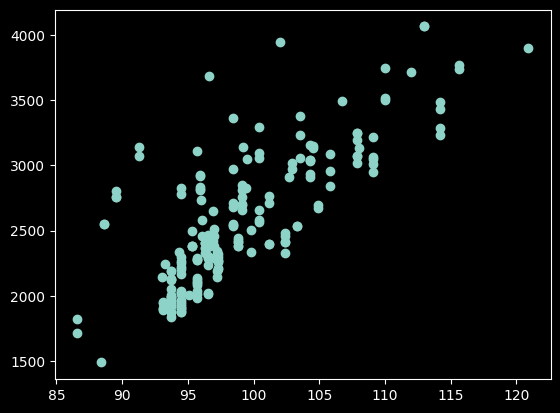

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('datasets/automobile/imports-85.csv', delimiter=',')

# 马力(21)和高速每公里加仑数(24)的关系
mask = ~np.isnan(data[:, 9]) & ~np.isnan(data[:, 13])

# 提取有效的 x_data 和 y_data
x_data = data[mask, 9]
y_data = data[mask, 13]

plt.scatter(x=x_data, y=y_data)
plt.show()